In [1]:
import datetime as dt
import os
import yfinance as yf
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math


def pull_stock_data(tickers:str, start:str, end:str, interval:str, stripdateindex:str, column:str) -> pd.DataFrame:
    """
    Returns a dataframe with chosen stock information for last day of the month.

    Parameters:
    -------------
    tickers (str): Yahoo finance tickers for companies divided ONLY by single space
    start (str): start date of the period (format yyyy-mm-dd)
    end (str): end date of the period (format yyyy-mm-dd)
    interval (str): wanted interval (1d, 1m, 1y)
    stripdateindex (str): argument for stripping datetime index down (d - day, m - month, y- year)
    columns (list): list of wanted values, args same as in yahoo finance
    """
    # data download
    df = yf.download(tickers = tickers, start = start, end = end, interval = interval, groupby = 'ticker')
    # changing index from datetime to just year and month
    df['Date'] = df.index
    dfg = df.groupby([df.index.year, df.index.month], as_index=False).last()
    dfg.reset_index(inplace=True, drop=True)
    dfg.set_index('Date', inplace=True)
    dfg.index = pd.to_datetime(dfg.index).to_period(stripdateindex)
    # dropping na rows
    dfg.dropna(inplace = True)
    return dfg[column]

    
def save_to_desktop(dataframe:pd.DataFrame, file_name:str):
    """
    Saves dataframe to desktop in csv format under filename provided

    Parameters:
    ------------
    dataframe (pd.DataFrame): dataframe that is to be saved
    file_name (str): name of the file
    """
    # defining path to desktop on running unit
    desktop = os.path.join(os.path.join(os.environ['USERPROFILE']), 'Desktop')
    # saving file under chosen name on desktop
    dataframe.to_csv(desktop+'/'+file_name+'.csv', sep=';')



In [2]:
tick = "NKE MSFT XOM INTC CAT WMT JPM F UPS MKC"
st = '2000-12-01'
en = '2020-12-31'
intv = '1d'
strpdt = 'm'
col = ['Close', 'Volume']

dftest = pull_stock_data(tick, st, en, intv, strpdt, col)
dftest.head(5)

[*********************100%***********************]  10 of 10 completed


C:\Users\maxim\AppData\Local\Temp\ipykernel_4008\4046405710.py:33: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  dfg.index = pd.to_datetime(dfg.index).to_period(stripdateindex)


Close                                                      \
               CAT          F     INTC        JPM        MKC      MSFT   
Date                                                                     
2000-12  23.656250  23.437500  30.0625  45.437500   9.015625  21.68750   
2001-01  22.110001  28.190001  37.0000  54.990002   9.112500  30.53125   
2001-02  20.799999  27.809999  28.5625  46.660000   9.825000  29.50000   
2001-03  22.190001  28.120001  26.3125  44.900002  10.497500  27.34375   
2001-04  25.100000  29.480000  30.9100  47.980000   9.825000  33.87500   

                                                     Volume           \
              NKE        UPS        WMT        XOM      CAT        F   
Date                                                                   
2000-12  6.976563  58.750000  53.125000  43.468750  3051800  4746800   
2001-01  6.876250  61.900002  56.799999  42.075001  3889000  4553600   
2001-02  4.878750  56.529999  50.090000  40.525002  3025200  4803100   
2001-03  5.043750  56.900002  50.500000  40.500000  3046800  3807000   
2001-04  5.226250  57.450001  51.740002  44.299999  5055000  5593100   

                                                                             \
             INTC       JPM      MKC      MSFT       NKE      UPS       WMT   
Date                                                                          
2000-12  54053600   9657000   998000  99977600   8772800  1096000   6582300   
2001-01  71894200  13130800   264000  81898800   7408000  2782200  10848100   
2001-02  48601400  10510600   962800  84608400  23287200   850200   7748200   
2001-03  47297100   8463000  1899600  91201600   4391200   925700   8308400   
2001-04  41266300   7737700   956400  74368200   9381600  1041500   6597800   

                   
              XOM  
Date               
2000-12   9564000  
2001-01  17017600  
2001-02  11591200  
2001-03  13186600  
2001-04  15066600

# Class 2 Problem set

## Question 1

In [3]:
# We only care about returns -
df1 = dftest['Close']
df1 = df1.pct_change()
df1.head()

,CAT,F,INTC,JPM,MKC,MSFT,NKE,UPS,WMT,XOM
Date,,,,,,,,,,
2000-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01,-0.065363,0.202773,0.230769,0.210234,0.010745,0.407781,-0.014379,0.053617,0.069176,-0.032063
2001-02,-0.059249,-0.013480,-0.228041,-0.151482,0.078189,-0.033777,-0.290493,-0.086753,-0.118134,-0.036839
2001-03,0.066827,0.011147,-0.078775,-0.037720,0.068448,-0.073093,0.033820,0.006545,0.008185,-0.000617
2001-04,0.131140,0.048364,0.174727,0.068597,-0.064063,0.238857,0.036183,0.009666,0.024554,0.093827


In [4]:
#save_to_desktop(dfsave, 'data')

#### Process F-F risk free rates downloaded previously

In [5]:
fama = pd.read_csv(r"F-F_Research_Data_Factors.CSV", sep=';')
fama['Date'] = pd.to_datetime(fama['Date'].astype('string'), format='%Y%m')
fama.set_index('Date', inplace=True)
fama.index = fama.index.to_period('m')
# Values given in CSV are plain percentages - division by 100
fama = fama.divide(100)
fama.head()

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07,0.0296,-0.0256,-0.0243,0.0022
1926-08,0.0264,-0.0117,0.0382,0.0025
1926-09,0.0036,-0.0140,0.0013,0.0023
1926-10,-0.0324,-0.0009,0.0070,0.0032
1926-11,0.0253,-0.0010,-0.0051,0.0031


In [6]:
# Join risk free rates to stock returns in periods
dffull = pd.merge(df1,fama, how='left', left_index=True, right_index=True)
# drop first NULL row which is causing regression to fail
dffull = dffull.dropna()

In [7]:
# Calculate excess stock return for each company
for i in dffull.columns.tolist()[:10]:
    dffull[i+'_re'] = dffull[i]-dffull['RF']
# Calculate excess Market return
dffull['reM'] = dffull['Mkt-RF']-dffull['RF']
dffull.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 240 entries, 2001-01 to 2020-12
Freq: M
Data columns (total 25 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CAT      240 non-null    float64
 1   F        240 non-null    float64
 2   INTC     240 non-null    float64
 3   JPM      240 non-null    float64
 4   MKC      240 non-null    float64
 5   MSFT     240 non-null    float64
 6   NKE      240 non-null    float64
 7   UPS      240 non-null    float64
 8   WMT      240 non-null    float64
 9   XOM      240 non-null    float64
 10  Mkt-RF   240 non-null    float64
 11  SMB      240 non-null    float64
 12  HML      240 non-null    float64
 13  RF       240 non-null    float64
 14  CAT_re   240 non-null    float64
 15  F_re     240 non-null    float64
 16  INTC_re  240 non-null    float64
 17  JPM_re   240 non-null    float64
 18  MKC_re   240 non-null    float64
 19  MSFT_re  240 non-null    float64
 20  NKE_re   240 non-null    float64
 2

#### Regress Excess Stock returns (<STOCK_NAME>_re) on Excess Market returns (reM)
* intercept is the Alpha 
* coefficient for reM is the company's Beta

**TODO**: komentarz na końcu do różnic miedzy wynikami

In [8]:
def get_significance(pvalue):
    '''
    Helper function to make p-value visual with use of stars
    '''
    if pvalue > 0.1: return ''
    elif pvalue > 0.05: return '*'
    elif pvalue> 0.01: return '**'
    else: return '***'


In [9]:
def reg_it(df:pd.DataFrame, cols):
    # Exog variable is constant - it's always Excess Market return
    X = sm.add_constant(df['reM'])
    # Store results in dict
    reg_results = {}
    for stock in cols:
        y = df[stock]
        reg_model = sm.OLS(y, X).fit()
        CAPM_params = {'AVG_excess_return' : y.mean(), 
            "alpha" : reg_model.params[0], # In Excel it's in %, but I'd rather keep it as fraction here for further calculations 
            "beta" : reg_model.params[1],
            "beta_pvalue" : get_significance(reg_model.pvalues[1]),
            "R2adj" : reg_model.rsquared_adj,
        }
        reg_results[stock[:-3]] = CAPM_params

    results_df = pd.DataFrame.from_dict(reg_results, orient='index')
    # Save it to .csv in our folder (you can copy from this output dataframe and paste to excel directly tough...)
    # results_df.to_csv('Q1_results.csv', sep=';')
    return results_df

In [10]:
colsreg = [x for x in dffull.columns.tolist() if '_re' in x]

results_df = reg_it(dffull, colsreg)
results_df


,AVG_excess_return,alpha,beta,beta_pvalue,R2adj
CAT,0.011259,0.004257,1.318228,***,0.461642
F,0.003513,-0.005400,1.678019,***,0.289176
INTC,0.005094,-0.001265,1.197149,***,0.353397
JPM,0.006734,-0.000202,1.305788,***,0.489124
MKC,0.009868,0.008069,0.338575,***,0.097466
MSFT,0.011207,0.006089,0.963456,***,0.349710
NKE,0.013655,0.009598,0.763648,***,0.277536
UPS,0.005042,0.000963,0.768040,***,0.327946
WMT,0.004354,0.002290,0.388600,***,0.114213
XOM,0.000399,-0.003497,0.733508,***,0.323427


#### Estimate SML
* regress Average Excess Stock returns on estimated market Betas for each stock
* we obtain lambda_0 (constant) and lambda_1 (price of risk)

In [11]:
# this part gets random 10 consecutive months
nrows = range(dffull.shape[0])
ix = random.randint(nrows.start, nrows.stop-10)
smldf = dffull.iloc[ix:ix+10,:]

smlstuff = reg_it(smldf, colsreg)


In [12]:
# for whole
SML_model = sm.OLS(results_df['AVG_excess_return'], sm.add_constant(results_df['beta'])).fit()
# for 10 consecutive months
SML_model2 = sm.OLS(smlstuff['AVG_excess_return'], sm.add_constant(smlstuff['beta'])).fit()
print(f'''
    For the whole period:
    lambda_0 : {SML_model.params[0]},
    lambda_1 : {SML_model.params[1]},
    R2_adj : {SML_model.rsquared_adj}

    For random 10 consecutive months:
    lambda_0 : {SML_model2.params[0]},
    lambda_1 : {SML_model2.params[1]},
    R2_adj : {SML_model2.rsquared_adj}
'''
)



    For the whole period:
    lambda_0 : 0.007795225145643754,
    lambda_1 : -0.0007221373275028279,
    R2_adj : -0.11886624814672841

    For random 10 consecutive months:
    lambda_0 : 0.022810030214319106,
    lambda_1 : -0.015552764443147701,
    R2_adj : 0.2823176895559414



**COMMENT HERE ABOUT DIFFERENCES IN RESULTS**

## Question 2
*Repeat your analysis (as in Question 1) for each of the four 5-year periods. For a selected company andfor the EW portfolio, compare the dynamics of the market beta over the 5-year periods. What can you sayabout the stability of your estimates (speciÖcally the market beta)?*

### Dividing dataframe into 4 parts and applying regression for all of them

In [13]:
todiv = len(dffull)
p1, p2, p3, p4, p5 = np.linspace(1,todiv, 5)
dfq1 = dffull.iloc[0:math.floor(p2),:]
dfq2 = dffull.iloc[math.ceil(p2):math.floor(p3)]
dfq3 = dffull.iloc[math.ceil(p3):math.floor(p4)]
dfq4 = dffull.iloc[math.ceil(p4):math.floor(p5)]

q1result = reg_it(dfq1, colsreg) 
q2result = reg_it(dfq2, colsreg)
q3result = reg_it(dfq3, colsreg)
q4result = reg_it(dfq4, colsreg)

display(q1result)
display(q2result)
display(q3result)
display(q4result)

,AVG_excess_return,alpha,beta,beta_pvalue,R2adj
CAT,0.016296,0.017515,1.172017,***,0.418654
F,-0.013186,-0.011587,1.538126,***,0.310445
INTC,0.004140,0.006425,2.197739,***,0.529581
JPM,0.000513,0.002182,1.604358,***,0.567111
MKC,0.008388,0.008483,0.091531,,-0.009738
MSFT,0.005173,0.006346,1.128144,***,0.290870
NKE,0.008017,0.008739,0.693887,***,0.199149
UPS,0.003422,0.003944,0.501956,***,0.216576
WMT,-0.002172,-0.001550,0.597625,***,0.194135
XOM,0.003909,0.004485,0.553664,***,0.195805


,AVG_excess_return,alpha,beta,beta_pvalue,R2adj
CAT,0.010271,0.010652,1.687301,***,0.614783
F,0.031069,0.031617,2.434411,***,0.303452
INTC,0.001156,0.001408,1.114522,***,0.550812
JPM,0.003961,0.004211,1.108946,***,0.352328
MKC,0.006727,0.006820,0.411305,***,0.183564
MSFT,0.001256,0.001491,1.042016,***,0.455140
NKE,0.013241,0.013442,0.893938,***,0.459529
UPS,0.000070,0.000255,0.820599,***,0.385578
WMT,0.001967,0.002034,0.294592,**,0.091863
XOM,0.002038,0.002134,0.424136,***,0.186205


,AVG_excess_return,alpha,beta,beta_pvalue,R2adj
CAT,-0.003020,-0.018809,1.590992,***,0.496348
F,0.000464,-0.012442,1.300574,***,0.383284
INTC,0.009954,0.001678,0.833976,***,0.205500
JPM,0.009398,-0.006470,1.598960,***,0.556801
MKC,0.012000,0.006879,0.516056,***,0.198761
MSFT,0.013728,0.005229,0.856454,***,0.212506
NKE,0.020827,0.014833,0.603966,***,0.105928
UPS,0.005908,-0.002666,0.863951,***,0.498387
WMT,0.002638,0.000216,0.244055,,0.014702
XOM,0.000352,-0.008272,0.869019,***,0.475517


,AVG_excess_return,alpha,beta,beta_pvalue,R2adj
CAT,0.019886,0.008037,0.900791,***,0.321866
F,-0.002222,-0.017926,1.193801,***,0.420028
INTC,0.009316,0.000873,0.641880,***,0.162628
JPM,0.014220,-0.000749,1.137931,***,0.568338
MKC,0.013705,0.008421,0.401739,**,0.093206
MSFT,0.024336,0.014342,0.759783,***,0.432515
NKE,0.015243,0.004640,0.806048,***,0.319255
UPS,0.011928,-0.000156,0.918648,***,0.282991
WMT,0.013555,0.007993,0.422825,***,0.140558
XOM,-0.008395,-0.025724,1.317405,***,0.614988


* ### Plotting difference between one comapny and whole portfolio

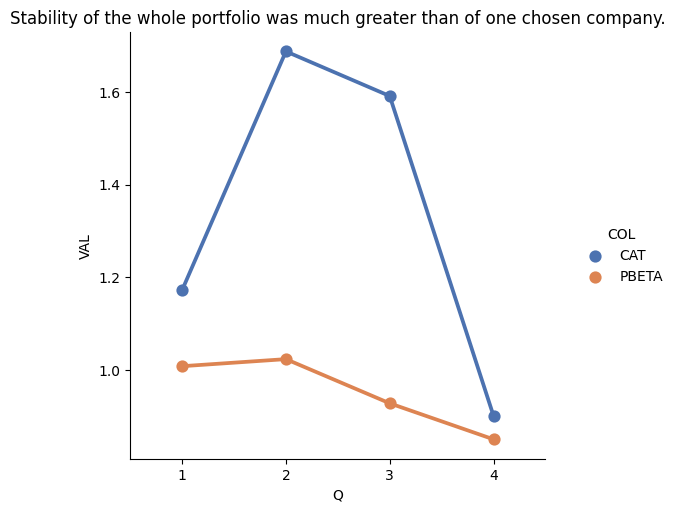

In [14]:
dfplot = {'Q':[1,2,3,4, 1,2,3,4], 'COL':['CAT','CAT','CAT','CAT', 'PBETA', 'PBETA', 'PBETA', 'PBETA'] ,'VAL':[q1result.iloc[0, 2], q2result.iloc[0, 2], q3result.iloc[0, 2], q4result.iloc[0, 2], q1result['beta'].mean(), q2result['beta'].mean(), q3result['beta'].mean(), q4result['beta'].mean()]}
dfplot = pd.DataFrame(dfplot)

sns.catplot(x='Q', y='VAL', hue='COL' , data=dfplot, kind='point', palette = 'deep')
plt.title('Stability of the whole portfolio was much greater than of one chosen company.')
plt.show()

## Question 3
*For each company and for the Equally-Weighted (EW) portfolio of the 10 stocks. estimate the basic perfor-mance measures for the 20-year period and discuss their meaning. Break them also into four 5-year periodsand discuss how the performance was changing over time. Finally, for the EW portfolio, plot how the valueof 1$ invested into this portfolio changes over time and what is its value after the 20 years.*

### Calculating performance metrics

MEASURES:
* Sharpe - (return-rf)/std
* Jenson's alpha - portfolio_return/(rf + Beta(return of market rf rate of return))

**TODO** teraz jest dla oddzielnych akcji trzeba też policzyć dla całego portfolio, podzielić całość na 5 letnie okresy i porównać ze sobą

In [15]:
dfperform = pd.DataFrame()

# loop calculating performance measures for all companies in the portfolio
for i in dffull.columns.tolist()[:10]:
    # sharpe
    dfperform[i+'_sh'] = (dffull[i+'_re']-dffull['RF'])/np.std(dffull[i+'_re'])
    # Jenson's
    dfperform[i+'_jen'] = (dffull[i+'_re'] - (dffull['RF'] + dffull['SMB'] * (dffull['reM'] - dffull['RF'])))

dfperform

,CAT_sh,CAT_jen,F_sh,F_jen,INTC_sh,INTC_jen,JPM_sh,JPM_jen,MKC_sh,MKC_jen,MSFT_sh,MSFT_jen,NKE_sh,NKE_jen,UPS_sh,UPS_jen,WMT_sh,WMT_jen,XOM_sh,XOM_jen
Date,,,,,,,,,,,,,,,,,,,,
2001-01,-0.869497,-0.077535,1.366314,0.190602,2.422729,0.218598,2.365299,0.198062,-0.001137,-0.001426,5.404787,0.395610,-0.385881,-0.026550,0.708421,0.041446,1.139806,0.057005,-0.737503,-0.044235
2001-02,-0.763166,-0.067703,-0.150031,-0.021934,-2.595332,-0.236495,-1.886725,-0.159936,1.465777,0.069735,-0.563335,-0.042231,-4.568494,-0.298947,-1.561097,-0.095207,-2.454966,-0.126588,-0.764615,-0.045293
2001-03,0.667016,0.058621,0.019552,0.002942,-0.960137,-0.086980,-0.546982,-0.045925,1.246887,0.060242,-1.109508,-0.081299,0.389583,0.025615,-0.030687,-0.001660,-0.004193,-0.000020,-0.155145,-0.008823
2001-04,1.408079,0.122946,0.288703,0.040170,1.838523,0.166533,0.721055,0.060403,-1.492224,-0.072257,3.145779,0.230663,0.434998,0.027990,0.030875,0.001472,0.327133,0.016361,1.480179,0.085633
2001-05,0.827499,0.072465,-1.284060,-0.180436,-1.460149,-0.132593,0.213306,0.017965,0.448311,0.021570,0.200232,0.014687,-0.358341,-0.023402,0.470100,0.028393,-0.121188,-0.006227,-0.080988,-0.004727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08,0.807883,0.070934,0.224691,0.031737,0.740829,0.067430,0.433299,0.036702,1.199762,0.057946,1.360012,0.100060,2.239038,0.146264,2.414281,0.146087,1.422003,0.072997,-0.878460,-0.050888
2020-09,0.546427,0.047879,-0.168396,-0.023646,0.177219,0.016105,-0.466406,-0.039311,-1.222653,-0.058866,-0.920312,-0.067582,1.866597,0.121809,0.301064,0.018211,0.145152,0.007449,-2.420201,-0.140646
2020-10,0.602399,0.053691,1.142032,0.161385,-1.597502,-0.144119,0.215685,0.019110,-1.458016,-0.069291,-0.511503,-0.036646,-0.669614,-0.042768,-0.948586,-0.056408,-0.165789,-0.007567,-0.860483,-0.049086


### Ploting the change of 1 dollar value in the portfolio over time  